### DATA IMPORT 

The dataset contains informations about 30 features to allow us to analyze and predict if the candidate is default or not. All the observations are continous. 

There are <b> 94000 </b> unique observations. 

The predictor for given data is given which allows us to use supervised models.

<b> GOAL : </b>

Correctly predict default candidates (1 means default, 0 means non-default) using val.csv file


In [1]:
import pandas as pd
df = pd.read_csv('Data Science HW design model.csv')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94000 entries, 0 to 93999
Data columns (total 31 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   A1       94000 non-null  float64
 1   A2       94000 non-null  float64
 2   A3       94000 non-null  float64
 3   A4       94000 non-null  float64
 4   A5       94000 non-null  float64
 5   A6       94000 non-null  float64
 6   A7       94000 non-null  float64
 7   A8       94000 non-null  float64
 8   A9       94000 non-null  float64
 9   A10      94000 non-null  float64
 10  A11      94000 non-null  float64
 11  A12      94000 non-null  float64
 12  A13      94000 non-null  float64
 13  A14      94000 non-null  float64
 14  A15      94000 non-null  float64
 15  A16      94000 non-null  float64
 16  A17      94000 non-null  float64
 17  A18      94000 non-null  float64
 18  A19      94000 non-null  float64
 19  A20      94000 non-null  float64
 20  A21      94000 non-null  int64  
 21  A22      940

In [3]:
df_val = pd.read_csv('Data Science HW design val.csv')

In [4]:
df_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11500 entries, 0 to 11499
Data columns (total 31 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   A1       11500 non-null  float64
 1   A2       11500 non-null  float64
 2   A3       11500 non-null  float64
 3   A4       11500 non-null  float64
 4   A5       11500 non-null  float64
 5   A6       11500 non-null  float64
 6   A7       11500 non-null  float64
 7   A8       11500 non-null  float64
 8   A9       11500 non-null  float64
 9   A10      11500 non-null  float64
 10  A11      11500 non-null  float64
 11  A12      11500 non-null  float64
 12  A13      11500 non-null  float64
 13  A14      11500 non-null  float64
 14  A15      11500 non-null  float64
 15  A16      11500 non-null  float64
 16  A17      11500 non-null  float64
 17  A18      11500 non-null  float64
 18  A19      11500 non-null  float64
 19  A20      11500 non-null  float64
 20  A21      11500 non-null  int64  
 21  A22      115

### Step 1 : Clean and prepare your data: 

### DATA PREPROCESSING 

### Missing Values :

Check for missing values 

In [5]:
df_val.isnull().sum()

A1         0
A2         0
A3         0
A4         0
A5         0
A6         0
A7         0
A8         0
A9         0
A10        0
A11        0
A12        0
A13        0
A14        0
A15        0
A16        0
A17        0
A18        0
A19        0
A20        0
A21        0
A22        0
A23        0
A24        0
A25        0
A26        0
A27        0
A28        0
A29        0
A30        0
default    0
dtype: int64

The data contains no missing values

In [61]:
df.A21.value_counts()

10.0     10804
111.0     9534
19.0      1460
12.0      1457
14.0      1442
         ...  
105.0      224
107.0      219
106.0      201
110.0      197
109.0      189
Name: A21, Length: 102, dtype: int64

## OUTLIERS

array([[<AxesSubplot:title={'center':'A1'}>,
        <AxesSubplot:title={'center':'A2'}>,
        <AxesSubplot:title={'center':'A3'}>,
        <AxesSubplot:title={'center':'A4'}>],
       [<AxesSubplot:title={'center':'A5'}>,
        <AxesSubplot:title={'center':'A6'}>,
        <AxesSubplot:title={'center':'A7'}>,
        <AxesSubplot:title={'center':'A8'}>],
       [<AxesSubplot:title={'center':'A9'}>,
        <AxesSubplot:title={'center':'A10'}>,
        <AxesSubplot:title={'center':'A11'}>,
        <AxesSubplot:title={'center':'A12'}>],
       [<AxesSubplot:title={'center':'A13'}>,
        <AxesSubplot:title={'center':'A14'}>,
        <AxesSubplot:title={'center':'A15'}>,
        <AxesSubplot:title={'center':'A16'}>],
       [<AxesSubplot:title={'center':'A17'}>,
        <AxesSubplot:title={'center':'A18'}>,
        <AxesSubplot:title={'center':'A19'}>,
        <AxesSubplot:title={'center':'A20'}>],
       [<AxesSubplot:title={'center':'A21'}>,
        <AxesSubplot:title={'center':'

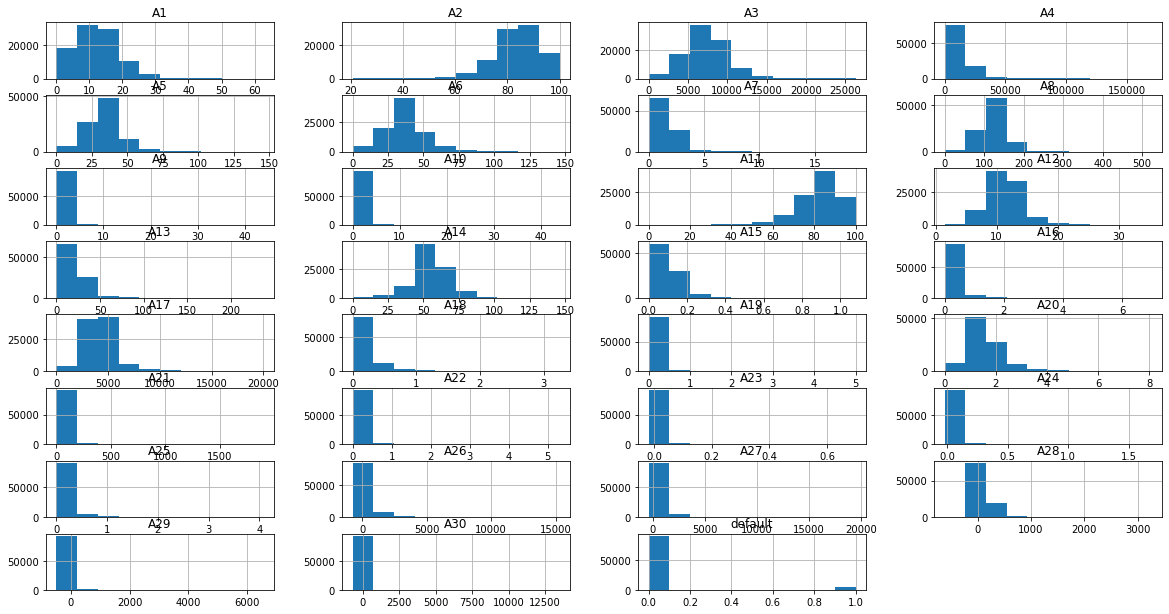

In [7]:
df.hist(figsize=(20,40),layout=(30,4))

The data seems to be skewed for most of the features, inorder to properly visualize the outliers, I have plotted the box plot for all the features.

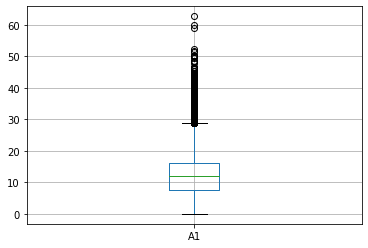

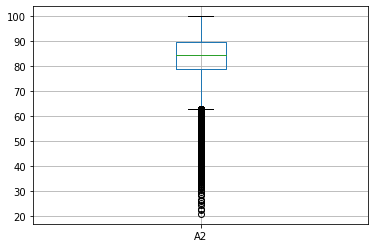

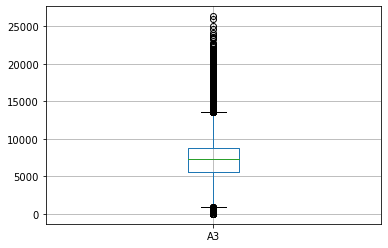

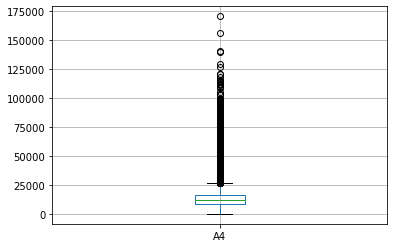

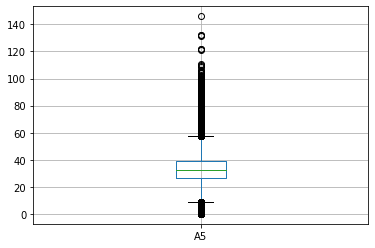

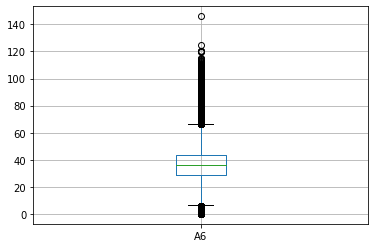

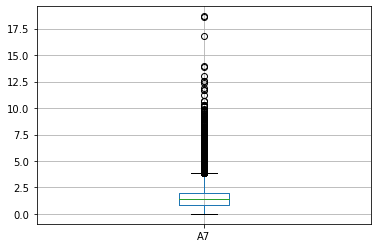

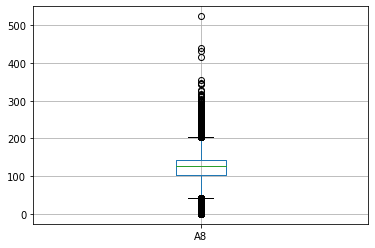

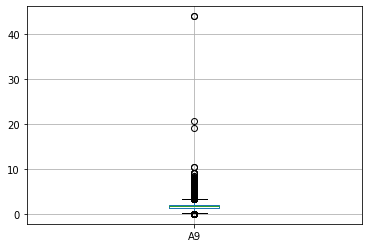

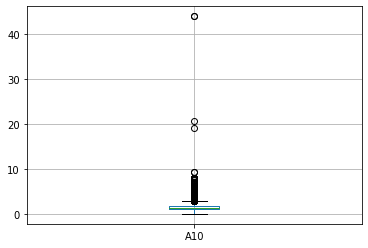

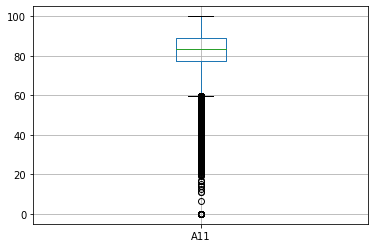

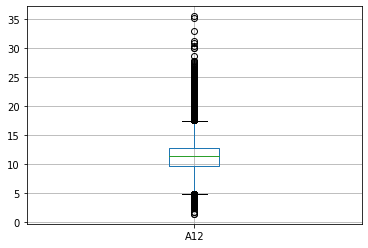

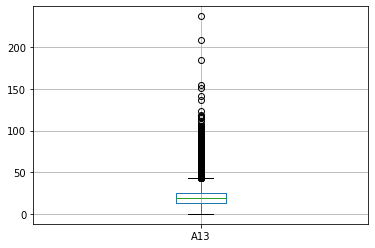

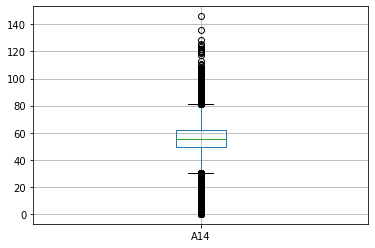

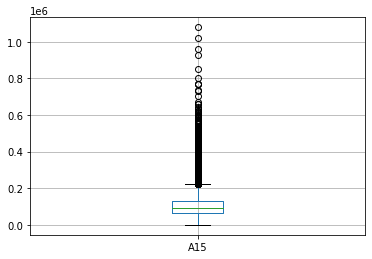

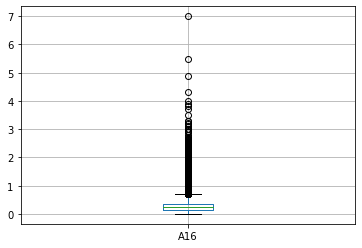

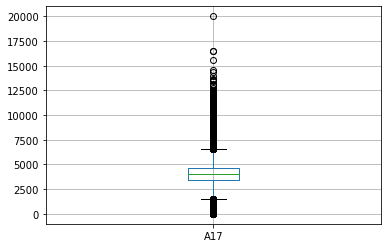

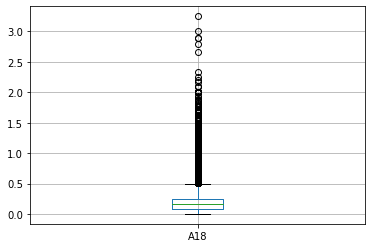

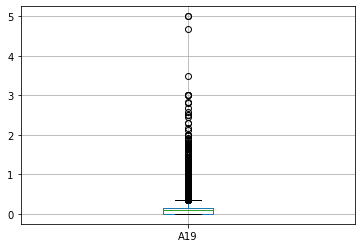

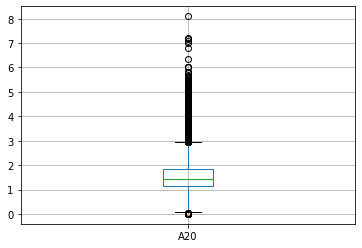

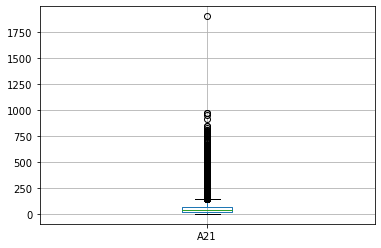

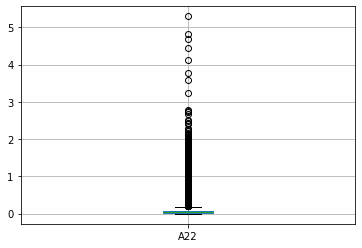

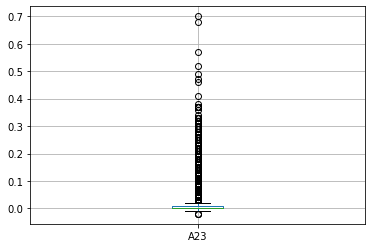

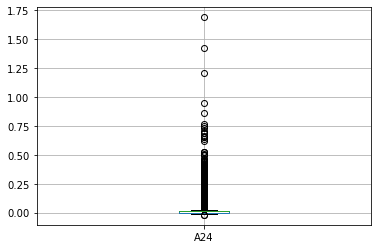

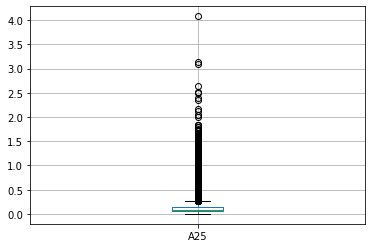

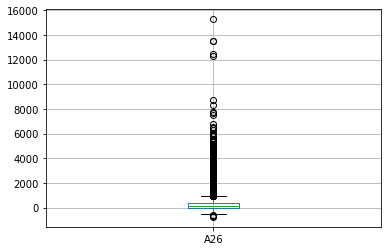

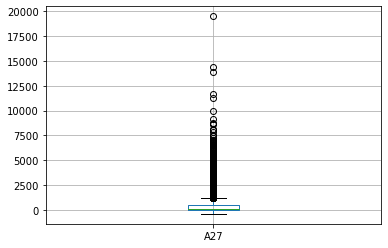

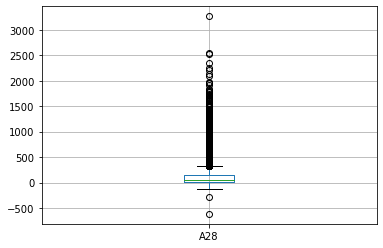

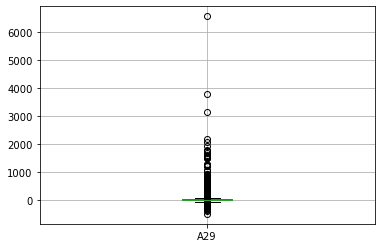

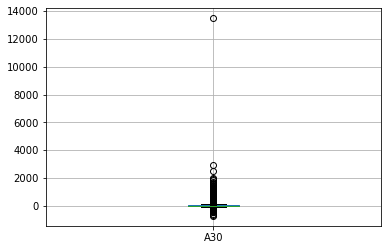

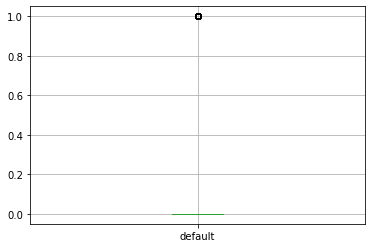

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

for i in df.columns:
    df.boxplot(column=i)
    plt.show()

We find that the data has many outliers, If we had to remove the outliers more than 50% of the data is removed from the dataset. Instead we can impute the outliers of each feature by capping the outlier values with the 10th and 90th percentile values

In [9]:
import numpy as np
cols = ['A1', 'A2','A3','A4', 'A5','A6','A7', 'A8','A9', 'A10', 'A11','A12','A13', 'A14','A15','A16', 'A17','A18'
       ,'A19', 'A20','A21','A22', 'A23','A24','A25', 'A26','A27','A28', 'A29','A30']

Q10 = df[cols].quantile(0.10)
Q90 = df[cols].quantile(0.90)

df[cols] = np.where(df[cols] < Q10,Q10,df[cols])
df[cols] = np.where(df[cols] > Q90,Q90,df[cols])  

In [10]:
df.describe()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A22,A23,A24,A25,A26,A27,A28,A29,A30,default
count,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,...,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000
mean,11.914837,84.206586,7238.511225,12651.641766,33.196271,36.587689,1.451228,123.426096,1.687591,1.401039,...,0.055851,0.005558,0.009427,0.108291,232.752303,287.189956,87.794747,21.874932,28.752358,0.042553
std,5.408093,6.850754,2052.542068,4938.457121,8.767080,10.561492,0.750047,25.502458,0.518557,0.411714,...,0.052086,0.007482,0.010331,0.065930,274.218537,365.382508,85.503599,25.764889,41.787039,0.201849
min,3.330000,73.000000,3984.617000,6028.570000,19.440000,20.290000,0.360000,80.440000,0.917000,0.750000,...,0.010000,0.000000,0.000000,0.040000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.670000,79.000000,5618.627500,8700.000000,26.880000,28.780000,0.820000,103.027500,1.272000,1.000000,...,0.010000,0.000000,0.000000,0.060000,0.000000,0.000000,14.970000,0.000000,0.000000,0.000000
50%,12.020000,84.360000,7285.590000,11862.650000,32.770000,35.940000,1.420000,127.240000,1.667000,1.399000,...,0.030000,0.000000,0.010000,0.090000,115.140000,102.265000,59.350000,10.500000,0.000000,0.000000
75%,16.080000,89.670000,8780.870000,15896.575000,39.100000,43.830000,2.020000,143.100000,2.064000,1.714000,...,0.080000,0.010000,0.010000,0.140000,380.142500,485.880000,140.952500,34.860000,49.862500,0.000000
max,20.500000,94.720000,10528.048000,21877.285000,48.330000,54.830000,2.700000,161.000000,2.556000,2.067000,...,0.170000,0.020000,0.030000,0.250000,808.052000,1060.656000,258.490000,76.761000,119.251000,1.000000


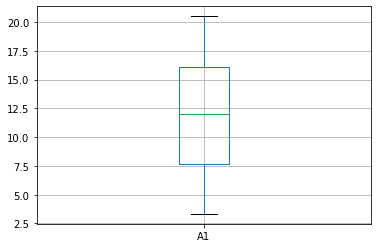

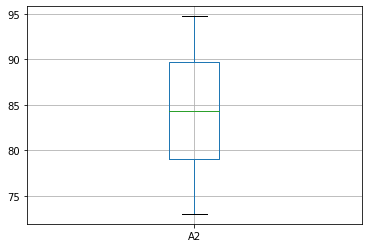

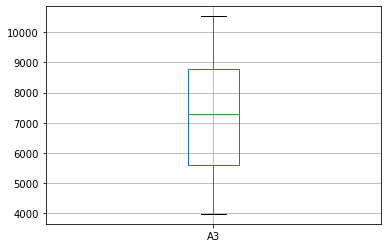

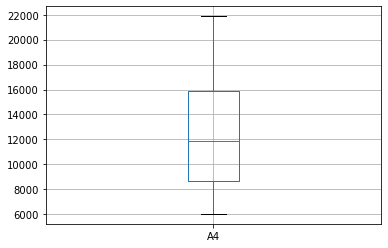

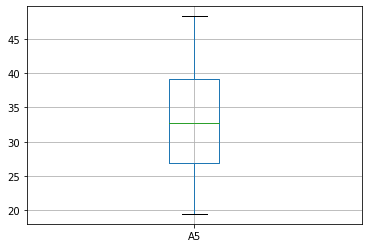

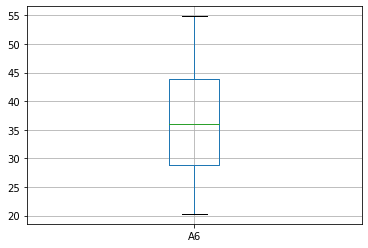

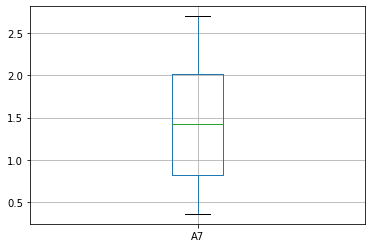

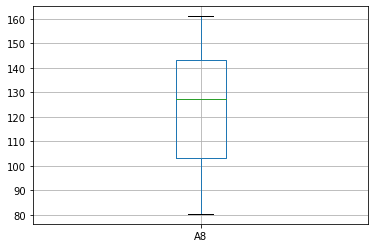

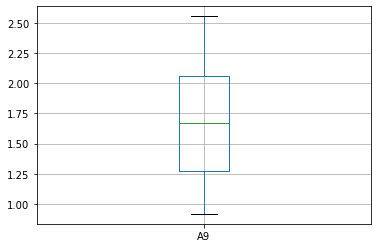

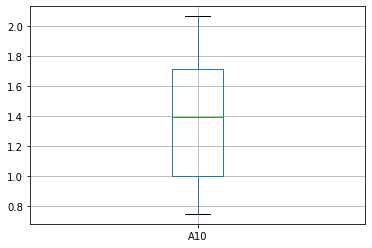

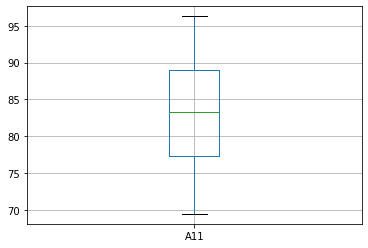

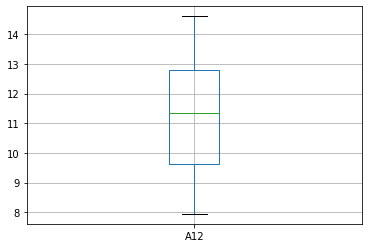

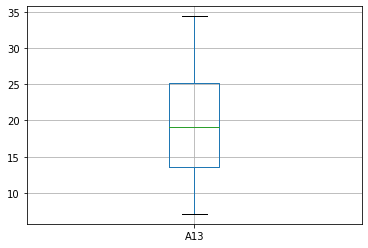

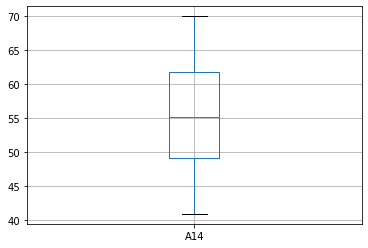

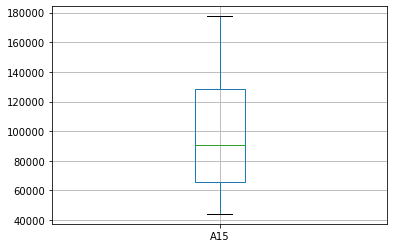

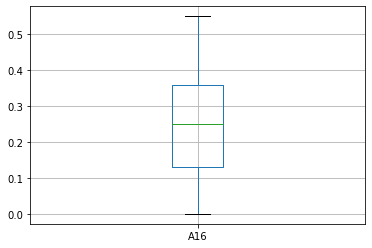

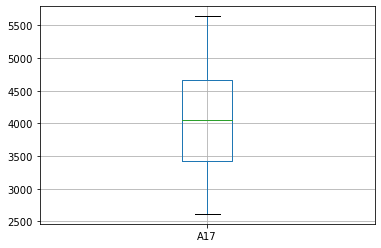

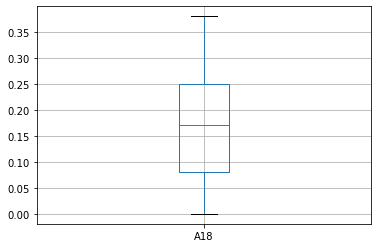

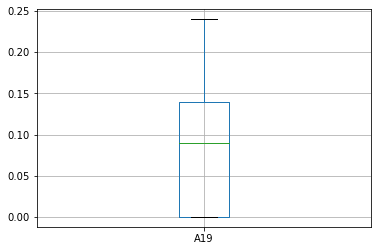

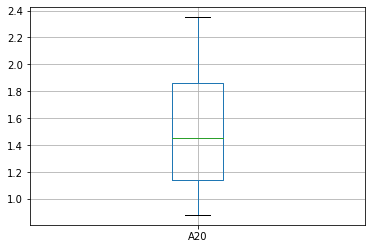

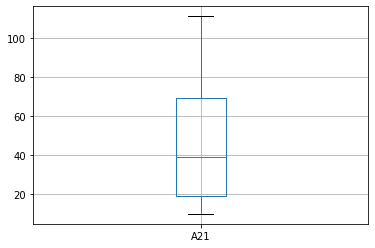

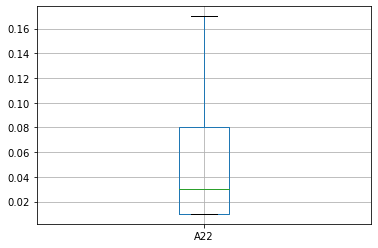

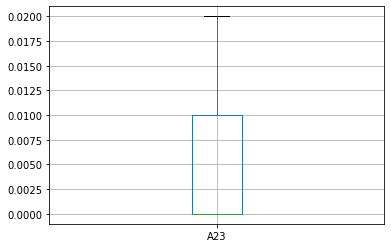

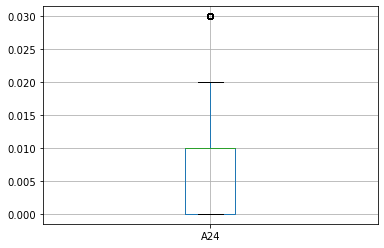

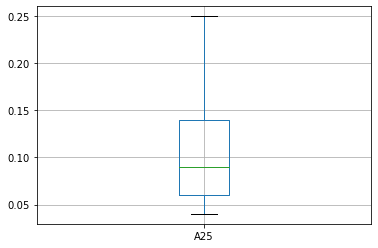

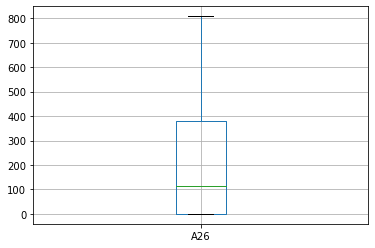

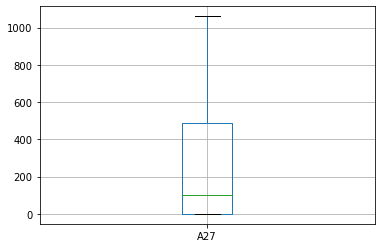

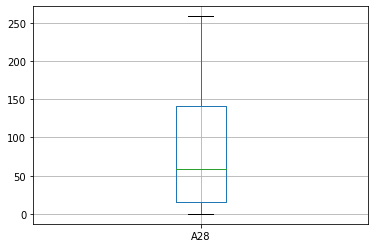

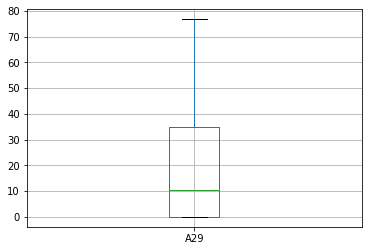

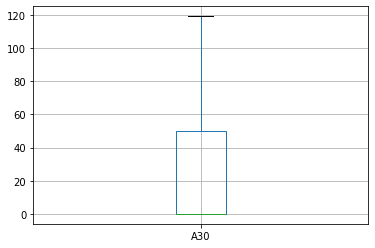

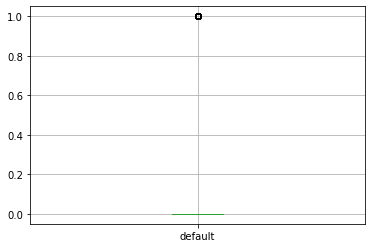

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

for i in df.columns:
    df.boxplot(column=i)
    plt.show()

The data now seems to be properly distributed for all the columns. 

## Uninformative features 

I have indivually checked for the data in the following columns and found that more than 60% of the data is the same. Even performing data analysis using these columns would lead to biased results. So I am dropping these columns 

In [12]:
df.A23.value_counts()# correlation analysis 

0.00    56464
0.01    22827
0.02    14709
Name: A23, dtype: int64

In [13]:
df.A24.value_counts()

0.00    40510
0.01    30868
0.03    12503
0.02    10119
Name: A24, dtype: int64

In [14]:
df.A30.value_counts()

0.000      52249
119.251     9400
19.880        35
10.000        32
25.000        30
           ...  
7.990          1
98.780         1
85.270         1
117.170        1
117.010        1
Name: A30, Length: 10513, dtype: int64

In [15]:
df.drop('A23', axis = 1, inplace = True)
df.drop('A24', axis = 1, inplace = True)
df.drop('A30', axis = 1, inplace = True)

## Duplicate records 

In [16]:
d = df.duplicated()
print(d.sum())
df[d]

4


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A19,A20,A21,A22,A25,A26,A27,A28,A29,default
27342,16.21,77.89,7869.57,12584.75,36.89,40.33,1.65,130.85,1.625,1.400,...,0.14,1.31,10.0,0.01,0.17,0.0,0.0,0.0,0.0,0
45462,11.03,84.42,7847.80,12001.76,29.30,32.97,1.85,146.77,1.658,1.389,...,0.09,1.11,10.0,0.01,0.09,0.0,0.0,0.0,0.0,0
56774,11.33,83.63,8171.30,20198.02,30.27,31.88,1.43,136.45,2.105,1.662,...,0.10,1.28,10.0,0.01,0.11,0.0,0.0,0.0,0.0,0
75540,7.40,92.93,10502.36,12046.67,22.67,25.00,0.40,110.93,1.556,1.444,...,0.00,1.07,20.0,0.01,0.07,0.0,0.0,0.0,0.0,0


Since we have only 4 duplicate records in the data, we will remove this from the data set so that we get only distinct records. Post removing the duplicate, we will check whether the duplicates have been removed from the data set or not.

In [17]:
df.drop_duplicates(inplace = True)

In [18]:
d = df.duplicated()
print(d.sum())
df[d]

0


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A19,A20,A21,A22,A25,A26,A27,A28,A29,default


### Scaling

The entire data is widely distributed for over different values. So I have used the min-max scaler, to scale the data. 

In [19]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

y = df['default']
X = df.drop('default', axis = 1)

X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [20]:
df.default.value_counts()

0    89996
1     4000
Name: default, dtype: int64

The data is highly imbalanced.More than 90% of the data has the default value as 0. So inorder to get accurate results I have used the SMOTE to upsample the data.

### Upsampling 

Upsamples minority class using SMOTE.Ratio argument is the percentage of the upsampled minority class in relation to the majority class. Default is 1.0


In [21]:
from imblearn.over_sampling import SMOTE 

def upsample_SMOTE(X_train, y_train, ratio = 1.0):
    
    sm = SMOTE(random_state=23, sampling_strategy=ratio)
    X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)
    return X_train_sm, y_train_sm

X_train_sm,y_train_sm = upsample_SMOTE(X_train, y_train, ratio=1.0)

In [62]:
y_train_sm.value_counts()

0    7477
1    7477
Name: default, dtype: int64

Now the data has equal zeros and ones. This will help us in analysing and predicting the data accurately.

In [23]:
y_train_sm.value_counts()

0    67469
1    67469
Name: default, dtype: int64

### PCA - FEATURE EXTRACTION

Inorder to reduce the dimenionality of the dataset I have used the PCA and Set the explained variance to be 99%

In [24]:
from sklearn.decomposition import PCA
pca = PCA(n_components= 0.99)
X_train_pca = pca.fit_transform(X_train_sm)
X_test_pca = pca.transform(X_test)

In [25]:
X_train_pca.shape

(134938, 24)

K Fold Cross validation:

In [26]:
from sklearn.model_selection import StratifiedKFold
sk =StratifiedKFold(n_splits=2, random_state=None, shuffle=False)

### Step 2 - Build your models: 

LOGISTIC REGRESSION 

I have used Grid Search with cross validation for selecting the hyper paramter C 

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

c_range=[0.001, 0.01, 0.1, 1, 10, 100, 1000]
grid = {"C": c_range , "penalty":["l1","l2"],"solver":["liblinear"]}
logreg = LogisticRegression(class_weight = 'balanced',max_iter = 10000)
logreg_cv = GridSearchCV(logreg,grid,cv= sk, scoring = 'roc_auc')

Now fit the model with the best parameters with the dimensionally reduced data

In [28]:
logreg_cv.fit(X_train_pca,y_train_sm)

print("tuned Hyperparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned Hyperparameters :(best parameters)  {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
accuracy : 0.8170674293129092


Training and Test score 

In [29]:
train_score = (logreg_cv.score(X_train_pca, y_train_sm))
test_score = (logreg_cv.score(X_test_pca, y_test))
print('Train Score',train_score)
print('Test Score' ,test_score)

Train Score 0.8172286392314867
Test Score 0.789157629043593


In [30]:
from sklearn.metrics import accuracy_score, roc_auc_score
y_pred = logreg_cv.predict(X_test_pca)
print('roc_auc_score: ', roc_auc_score(y_test, logreg_cv.predict_proba(X_test_pca)[:,1]))

roc_auc_score:  0.789157629043593


In [31]:
y_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [32]:
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score,f1_score
y_pred = logreg_cv.predict(X_test_pca)
cm = confusion_matrix(y_pred,y_test)
print("Confusion Matrix :\n{}".format(cm))


Confusion Matrix :
[[16240   276]
 [ 6287   696]]


72% of the data is correctly classified 

### Decision Tree

In [33]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier

Use the naive grid search to select the hyper parameters

In [34]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier

best_score = 0
for max_depth in [1,2,3,4,5]:
    for min_samples_leaf in [10,25,50,100,500]:
        for  min_samples_split in [10,50,100,150,200]:
        # for each combination of parameters, train an SVC
           
            dtree = DecisionTreeClassifier(max_depth = max_depth, min_samples_leaf = min_samples_leaf, min_samples_split = min_samples_split, random_state=0)
            dtree.fit(X_train_pca, y_train_sm)
        # evaluate the SVC on the test set
            score = dtree.score(X_test_pca, y_test)
        # if we got a better score, store the score and parameters
            if score > best_score:
                best_score = score
                best_parameters = {'max_depth': max_depth, 'min_samples': min_samples_leaf,'min_samples_split': min_samples_split}

print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

Best score: 0.75
Best parameters: {'max_depth': 5, 'min_samples': 500, 'min_samples_split': 10}


In [35]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth = 5,min_samples_leaf = 500,min_samples_split = 10,random_state=0)
dtree.fit(X_train_pca, y_train_sm)
Test_Score = dtree.score(X_test_pca, y_test)
Train_score = dtree.score(X_train_pca, y_train_sm)
print('Test_Score:', Test_Score, 'Train Score',Train_score)

Test_Score: 0.7475211711136645 Train Score 0.7509671108212661


In [36]:
from sklearn.metrics import accuracy_score, roc_auc_score
y_pred = dtree.predict(X_test_pca)
print('roc_auc_score: ', roc_auc_score(y_test, dtree.predict_proba(X_test_pca)[:,1]))

roc_auc_score:  0.771511086558955


[Text(165.3075, 199.32, 'X[0] <= -0.125\ngini = 0.5\nsamples = 134938\nvalue = [67469, 67469]'),
 Text(85.095, 163.07999999999998, 'X[0] <= -0.765\ngini = 0.379\nsamples = 65983\nvalue = [16740, 49243]'),
 Text(44.64, 126.83999999999999, 'X[0] <= -1.135\ngini = 0.263\nsamples = 36125\nvalue = [5636, 30489]'),
 Text(22.32, 90.6, 'X[0] <= -1.341\ngini = 0.173\nsamples = 18723\nvalue = [1790, 16933]'),
 Text(11.16, 54.359999999999985, 'X[19] <= -0.053\ngini = 0.118\nsamples = 10236\nvalue = [647, 9589]'),
 Text(5.58, 18.119999999999976, 'gini = 0.203\nsamples = 1702\nvalue = [195, 1507]'),
 Text(16.740000000000002, 18.119999999999976, 'gini = 0.1\nsamples = 8534\nvalue = [452, 8082]'),
 Text(33.480000000000004, 54.359999999999985, 'X[22] <= -0.099\ngini = 0.233\nsamples = 8487\nvalue = [1143, 7344]'),
 Text(27.9, 18.119999999999976, 'gini = 0.389\nsamples = 587\nvalue = [155, 432]'),
 Text(39.06, 18.119999999999976, 'gini = 0.219\nsamples = 7900\nvalue = [988, 6912]'),
 Text(66.9600000000

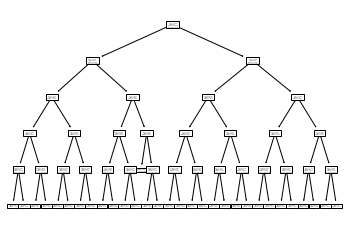

In [37]:
from sklearn import tree
tree.plot_tree(dtree)

In [38]:
y_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [39]:
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score,f1_score
cm = confusion_matrix(y_pred,y_test)
f = accuracy_score(y_pred,y_test)
print("Confusion Matrix :\n{}".format(cm))

Confusion Matrix :
[[16904   310]
 [ 5623   662]]


Out of 23499,From the data we find that the correctly classified are 71% of the data is correctly classified

### VALIDATION DATA 

##### Preprocessing 

In [40]:
import numpy as np
cols = ['A1', 'A2','A3','A4', 'A5','A6','A7', 'A8','A9', 'A10', 'A11','A12','A13', 'A14','A15','A16', 'A17','A18'
       ,'A19', 'A20','A21','A22', 'A23','A24','A25', 'A26','A27','A28', 'A29','A30']

Q10 = df_val[cols].quantile(0.10)
Q90 = df_val[cols].quantile(0.90)

df_val[cols] = np.where(df_val[cols] < Q10,Q10,df_val[cols])
df_val[cols] = np.where(df_val[cols] > Q90,Q90,df_val[cols])  

In [41]:
df_val.drop('A23', axis = 1, inplace = True)
df_val.drop('A24', axis = 1, inplace = True)
df_val.drop('A30', axis = 1, inplace = True)

In [42]:
d = df_val.duplicated()
print(d.sum())
df_val[d]

0


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A19,A20,A21,A22,A25,A26,A27,A28,A29,default


In [43]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

y = df_val['default']
X = df_val.drop('default', axis = 1)

X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [44]:
X_train.shape

(8625, 27)

In [45]:
from imblearn.over_sampling import SMOTE 

def upsample_SMOTE(X_train, y_train, ratio = 1.0):
    
    sm = SMOTE(random_state=23, sampling_strategy=ratio)
    X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)
    return X_train_sm, y_train_sm

X_train_sm,y_train_sm = upsample_SMOTE(X_train, y_train, ratio=1.0)

In [46]:
from sklearn.decomposition import PCA
pca = PCA(n_components= 0.99)
X_train_pca = pca.fit_transform(X_train_sm)
X_test_pca = pca.transform(X_test)

In [47]:
X_train_pca.shape

(14954, 23)

### Step 3 - Generate predictions:

Using the same models to predict the data 

Decision Tree 

In [48]:
dtree.fit(X_train_pca, y_train_sm)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=500, min_samples_split=10,
                       random_state=0)

In [49]:
from sklearn.metrics import accuracy_score, roc_auc_score
y_pred = dtree.predict(X_test_pca)
print('roc_auc_score: ', roc_auc_score(y_test, dtree.predict_proba(X_test_pca)[:,1]))

roc_auc_score:  0.7869233731488487


Logistic Regression 

In [50]:
logreg_cv.fit(X_train_pca, y_train_sm)

GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
             estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=10000),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             scoring='roc_auc')

In [51]:
from sklearn.metrics import accuracy_score, roc_auc_score
y_pred_log = logreg_cv.predict(X_test_pca)
print('roc_auc_score: ', roc_auc_score(y_test, logreg_cv.predict_proba(X_test_pca)[:,1]))

roc_auc_score:  0.8091231128166324


In [52]:
y_pred_log

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)

In [53]:
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score,f1_score
cm = confusion_matrix(y_pred_log,y_test)
print("Confusion Matrix :\n{}".format(cm))

Confusion Matrix :
[[1880   90]
 [ 643  262]]


Probabilities of the output being 0 and 1 for decision tree and logistic regression.

In [54]:
pred = dtree.predict_proba(X_test_pca)
pred

array([[0.50493653, 0.49506347],
       [0.88703466, 0.11296534],
       [0.88703466, 0.11296534],
       ...,
       [0.82910695, 0.17089305],
       [0.82910695, 0.17089305],
       [0.30331126, 0.69668874]])

In [55]:
x = pred[:,1]

In [56]:
pred1 = logreg_cv.predict_proba(X_test_pca)

In [57]:
y = pred1[:,1]

In [58]:
output_array = np.array(x)
np.savetxt("results1.csv", output_array, delimiter=",")

In [59]:
output_array = np.array(y)
np.savetxt("results2.csv", output_array, delimiter=",")